# Part 1: Images are Arrays
----------
### Slides covering the array structure of digital images
----------

## 2-D color images

In [1]:
# The first thing we need to do is import the right packages for dealing with image files
import matplotlib
import numpy as np
from skimage import data, io

In [2]:
# scikit-image comes with some example data. Lets load some 
image = data.astronaut()
io.imshow(image);

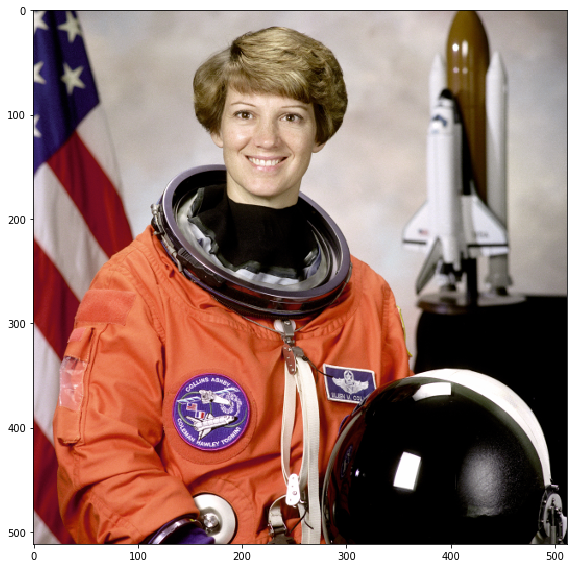

In [3]:
# This following line will change how large of an image io.imshow() makes
matplotlib.rcParams['figure.figsize'] = [8, 8]
io.imshow(image);

In [4]:
# So what type of data is "image"?
type(image)

numpy.ndarray

### Read all about numpy.ndarrays [here](https://docs.scipy.org/doc/numpy/reference/arrays.ndarray.html)

In [5]:
# Python will show you a snippet of the array if you just call it,
#but this is not terribly useful
image

array([[[154, 147, 151],
        [109, 103, 124],
        [ 63,  58, 102],
        ...,
        [127, 120, 115],
        [120, 117, 106],
        [125, 119, 110]],

       [[177, 171, 171],
        [144, 141, 143],
        [113, 114, 124],
        ...,
        [127, 118, 112],
        [124, 115, 108],
        [121, 116, 105]],

       [[201, 194, 193],
        [182, 178, 175],
        [168, 165, 164],
        ...,
        [128, 120, 117],
        [126, 116, 112],
        [124, 114, 109]],

       ...,

       [[186, 170, 176],
        [186, 170, 177],
        [183, 168, 170],
        ...,
        [  0,   0,   0],
        [  0,   0,   1],
        [  0,   0,   0]],

       [[183, 169, 170],
        [182, 167, 171],
        [185, 164, 176],
        ...,
        [  0,   0,   1],
        [  1,   1,   1],
        [  0,   0,   0]],

       [[184, 167, 172],
        [183, 165, 169],
        [180, 162, 171],
        ...,
        [  0,   0,   0],
        [  1,   1,   1],
        [  0,   0,   0]]

In [6]:
# Check some of the attributes of our numpy.ndarray

#number of dimensions
image.ndim

3

In [7]:
#size of each dimension (why does this image have three dimensions?)
image.shape

(512, 512, 3)

In [8]:
#type of data
image.dtype

dtype('uint8')

### It might be useful at this point to review [numpy data types](https://docs.scipy.org/doc/numpy-1.16.1/reference/arrays.scalars.html#built-in-scalar-types).

The most common types you will encounter are:
 * uint8 - integers between 0-255
 * uint16 - integers between 0-65,535
 * float64(or double) - floating point numbers, e.g., 1.45643, 5.0, 1.23435e9
 
scikit-image methods will usually output float64 values, regardless of which data type you start with.

Note that there are a finite number of floating point numbers that a computer can represent! Explaining why this is the case, and which numbers are valid, is complicated and will not be dealt with here. Wikipedia has some good [articles](https://en.wikipedia.org/wiki/Floating-point_arithmetic) on the subject.

In [9]:
# You can also use numpy.ndarray methods
flat_image = image.flatten() #what does this do?
flat_image.shape

(786432,)

In [10]:
# You can use indexing to select just parts of the array
face = image[0:200, 150:300, 0]
face.shape

(200, 150)

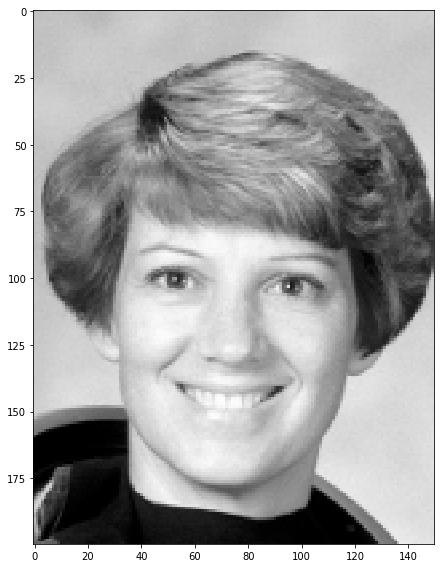

In [11]:
# Lets take a look at the cropped image using io.imshow()
io.imshow(face);

In [12]:
# Very small arrays are a little easier to visualize as images
eye = face[97:105, 49:59]
eye

array([[105, 102,  96, 106, 101, 103, 124, 137, 152, 156],
       [ 92,  75,  51,  57,  61,  63,  76,  90, 116, 147],
       [149,  80,  59,  71,  57,  41,  53,  79, 115, 135],
       [176,  81,  69, 146, 161,  42,  58, 100, 120, 187],
       [174,  83,  85, 116, 107,  35,  85, 186, 159, 207],
       [200,  96,  84,  72,  61,  62,  96, 134, 157, 234],
       [201, 149, 107, 103,  92,  98,  97, 118, 186, 224],
       [192, 186, 180, 183, 161, 142, 148, 167, 198, 197]], dtype=uint8)

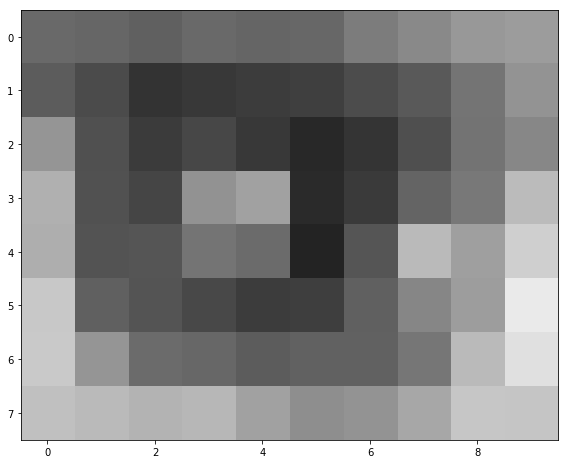

In [13]:
# Compare the image with the array above
io.imshow(eye);

In [14]:
# You can also return the values for specific pixels with indexing.
eye[2,2]

59

In [15]:
# You can return multiple values by providing a tuple or list of 
#coordinates for each axis.
eye[(2,3),(2,6)]

array([59, 58], dtype=uint8)

In [16]:
# To return all the values along an axis, use ':' by itself

eye[:,3]

array([106,  57,  71, 146, 116,  72, 103, 183], dtype=uint8)

In [17]:
# we can easily perform math on our numpy.ndarray
eye - 34

array([[ 71,  68,  62,  72,  67,  69,  90, 103, 118, 122],
       [ 58,  41,  17,  23,  27,  29,  42,  56,  82, 113],
       [115,  46,  25,  37,  23,   7,  19,  45,  81, 101],
       [142,  47,  35, 112, 127,   8,  24,  66,  86, 153],
       [140,  49,  51,  82,  73,   1,  51, 152, 125, 173],
       [166,  62,  50,  38,  27,  28,  62, 100, 123, 200],
       [167, 115,  73,  69,  58,  64,  63,  84, 152, 190],
       [158, 152, 146, 149, 127, 108, 114, 133, 164, 163]], dtype=uint8)

# Exercise

1. Try doing some math with the 'eye' array. What happens when an operation results in a value outside of 0-255?

In [18]:
eye2 = eye - 36
eye3 = eye + 55

print('eye: ')
print(eye)
print('eye2: ')
print(eye2)
print('eye3: ')
print(eye3)
print()
print('Value of position 4,5 in eye: ', eye[4,5])
print(' Result when you subtract 36: ', eye2[4,5])
print()
print('Value of position 6,0 in eye: ', eye[6,0])
print('      Result when you add 55: ', eye3[6,0])

eye: 
[[105 102  96 106 101 103 124 137 152 156]
 [ 92  75  51  57  61  63  76  90 116 147]
 [149  80  59  71  57  41  53  79 115 135]
 [176  81  69 146 161  42  58 100 120 187]
 [174  83  85 116 107  35  85 186 159 207]
 [200  96  84  72  61  62  96 134 157 234]
 [201 149 107 103  92  98  97 118 186 224]
 [192 186 180 183 161 142 148 167 198 197]]
eye2: 
[[ 69  66  60  70  65  67  88 101 116 120]
 [ 56  39  15  21  25  27  40  54  80 111]
 [113  44  23  35  21   5  17  43  79  99]
 [140  45  33 110 125   6  22  64  84 151]
 [138  47  49  80  71 255  49 150 123 171]
 [164  60  48  36  25  26  60  98 121 198]
 [165 113  71  67  56  62  61  82 150 188]
 [156 150 144 147 125 106 112 131 162 161]]
eye3: 
[[160 157 151 161 156 158 179 192 207 211]
 [147 130 106 112 116 118 131 145 171 202]
 [204 135 114 126 112  96 108 134 170 190]
 [231 136 124 201 216  97 113 155 175 242]
 [229 138 140 171 162  90 140 241 214   6]
 [255 151 139 127 116 117 151 189 212  33]
 [  0 204 162 158 147 153 152 17

## Some additional numpy.ndarray attributes and methods to know

     Normal shape:  (200, 150)
 Transposed shape:  (150, 200)


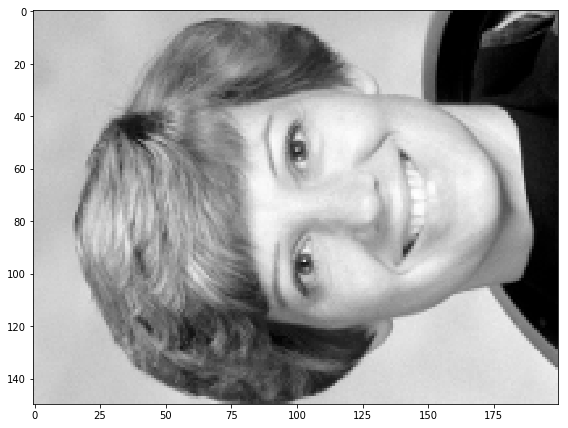

In [19]:
# Arrays have the 'T' attribute, which is the transposed data
#transposed = order of axes flipped
print('     Normal shape: ', face.shape)
print(' Transposed shape: ', face.T.shape)
io.imshow(face.T);

In [20]:
# Lets create a new array to make the operations easier to visualize

a = np.array([[1,2,3],
                       [4,5,6],
                       [0,0,0]]) #Note this is a list of lists

a

array([[1, 2, 3],
       [4, 5, 6],
       [0, 0, 0]])

In [21]:
a.max()

6

In [22]:
a.max(axis=0)

array([4, 5, 6])

In [23]:
a.max(axis=1)

array([3, 6, 0])

In [24]:
a.nonzero() #Note this returns two lists!

(array([0, 0, 0, 1, 1, 1]), array([0, 1, 2, 0, 1, 2]))

In [25]:
# When a method returns list of cooredinates for each axis, it can
#itslef be used to select elements in an array!
a[a.nonzero()]

array([1, 2, 3, 4, 5, 6])

In [26]:
# numpy.where() works similarly to nonzero(), but note
#the difference in syntax

np.where((a > 3) & (a < 6))

(array([1, 1]), array([0, 1]))

In [27]:
# You can combine indexing with numpy.where() and 
#assignment to change certain elements of an array

a[np.where((a > 3) & (a < 6))] = 255
a

array([[  1,   2,   3],
       [255, 255,   6],
       [  0,   0,   0]])

# Exercises

1. Display a cropped color image of the astronaut's* face.
2. Display a cropped color image of the model space shuttle in the image.
3. Display each color channel of image\[0:200, 0:100\] in grayscale.
    - Which channel is red?
    - Which channel is blue?
    - Which channel is green?
4. **\[Extra challenge\]** Create a new astronaut image where:
 * all perfectly white (r,g,b=255) pixels have been converted to red (r=255; g,b=0)
 * all perfectly black (r,g,b=0) pixels have been converted to blue (r,g=0; b=255)

*Retired astronaut Colonel Eileen Collins, the first woman to pilot and command the Space Shuttle

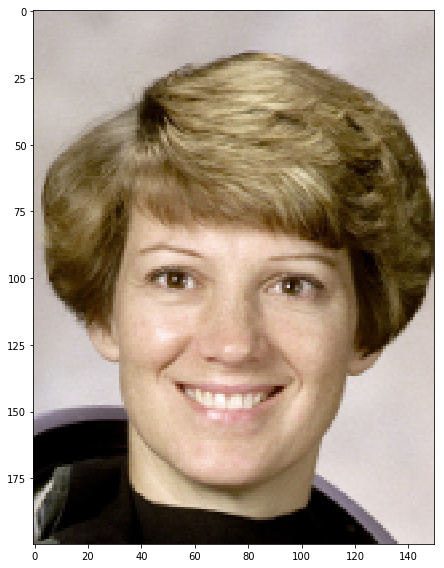

In [28]:
io.imshow(image[0:200, 150:300, :]);

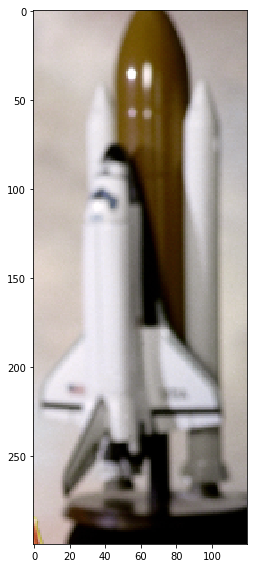

In [29]:
io.imshow(image[0:300, 350:470, :]);

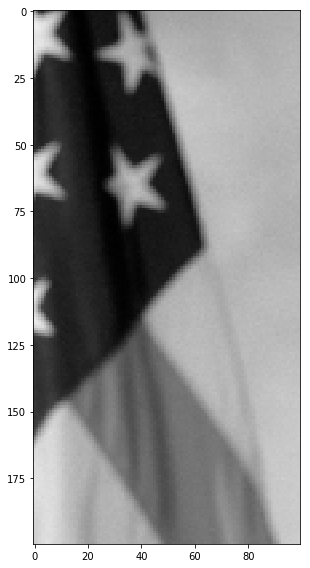

In [30]:
# this is red; notice the stripe is lighter than in the other channels
io.imshow(image[0:200, 0:100, 0]); 

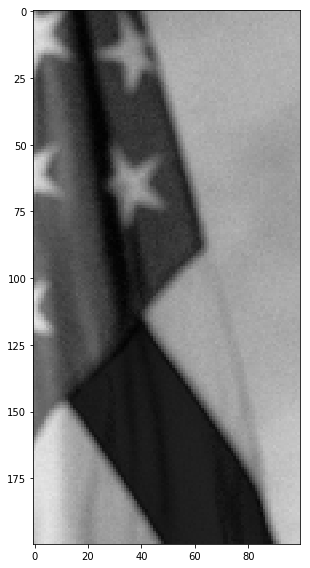

In [31]:
#this is blue, notice the the lightness of the blue field compared to the other channels
io.imshow(image[0:200, 0:100, 2]); 

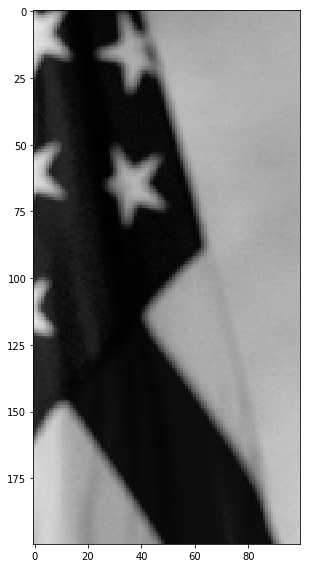

In [32]:
#this has to be green
io.imshow(image[0:200, 0:100, 1]); 

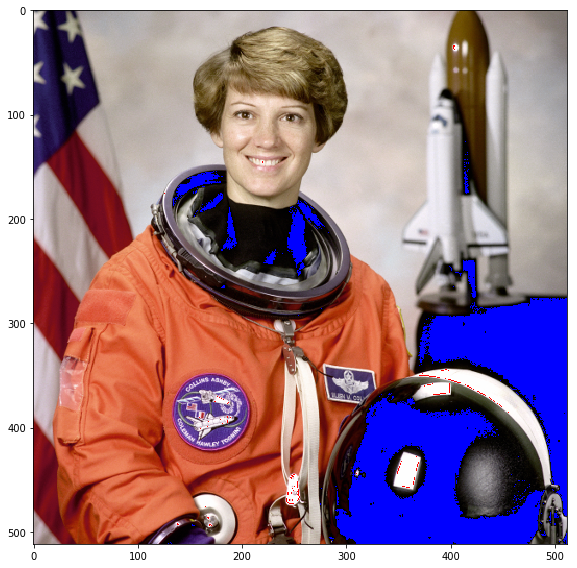

In [33]:
image_white_indices = np.where((image[:,:,0]==255) &
                               (image[:,:,1]==255) &
                               (image[:,:,2]==255))

image[image_white_indices]=[255,0,0]

image_black_indices = np.where((image[:,:,0]==0) &
                               (image[:,:,1]==0) &
                               (image[:,:,2]==0))

image[image_black_indices]=[0,0,255]

io.imshow(image);

## 3-D images

In [34]:
# Now lets create an image volume of 2x3x4 'voxels' (like pixels, but volume)
# Remember the 4th dimension is color!
# So we start with an empty array of 4 dimensions, where the 4th dimension gets our color (RGB) information
cube = np.zeros([2,3,4,3], dtype='uint8')
cube.shape

(2, 3, 4, 3)

In [35]:
# Now lets set some pixels in our cube
cube[0,0,0,0] = 255 #red
cube[1,1,1,1] = 255 #green
cube[1,2,2,2] = 255 #blue
cube[0,2,3,:] = 255 #white

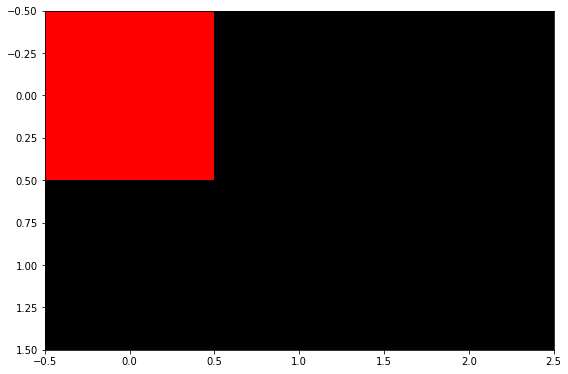

In [36]:
# We need to visualize this one plane at a time, because this is a 3-D image and our screen is 2-D!
io.imshow(cube[:,:,0,:]);

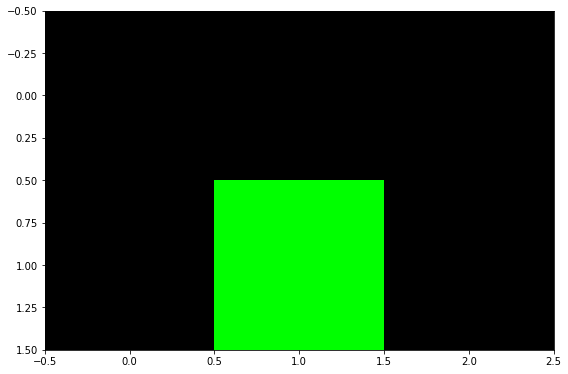

In [37]:
io.imshow(cube[:,:,1,:]);

/anaconda3/envs/ImPyClass2/lib/python3.7/site-packages/skimage/io/_plugins/matplotlib_plugin.py:77: UserWarning: Low image data range; displaying image with stretched contrast.
  warn("Low image data range; displaying image with "


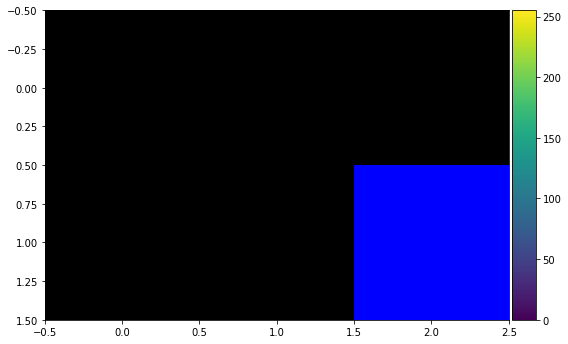

In [38]:
io.imshow(cube[:,:,2,:]);

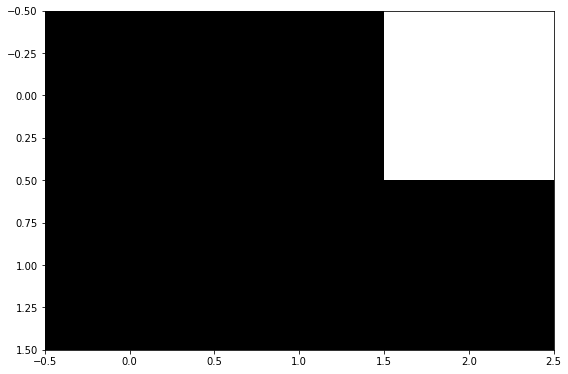

In [39]:
io.imshow(cube[:,:,3,:]);

-----------
### Explore what this looks like in 3-D space using FIJI
-----------

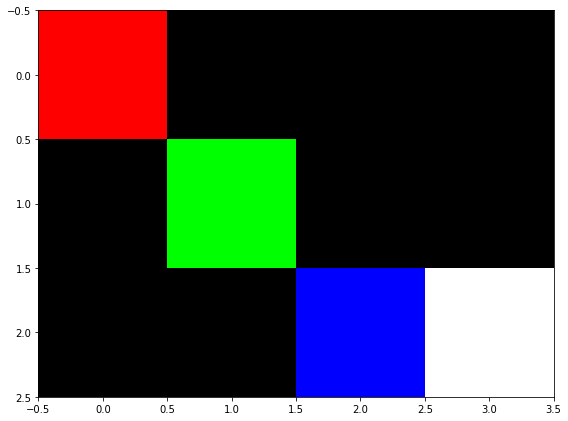

In [40]:
# If we take the maximum value along an axis, we can can view a "projection" of the volume
io.imshow(cube.max(axis=0));

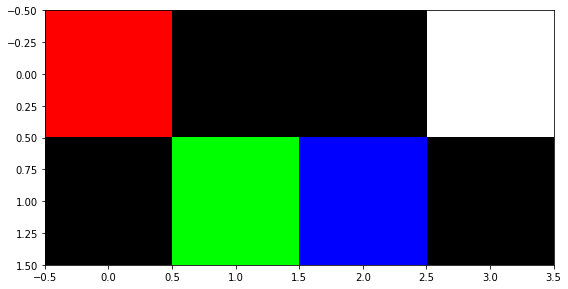

In [41]:
io.imshow(cube.max(axis=1));

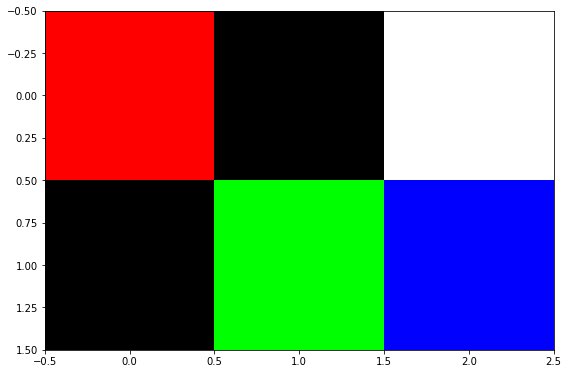

In [42]:
io.imshow(cube.max(axis=2));